# Explolation08
## dlib와 cv를 임포트해 고양이사진스티커를 붙혀보자.

### 일단 필요한 모듈 불러오자

In [567]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

### 필요한 모듈을 불러왔으면 사진을 불러오자.

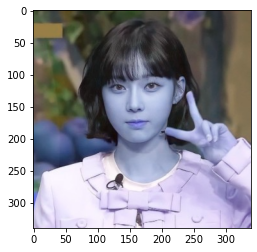

In [568]:
img_bgr = cv2.imread('/Users/janghan-yeong/Desktop/무제 폴더/다운로드.png')    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

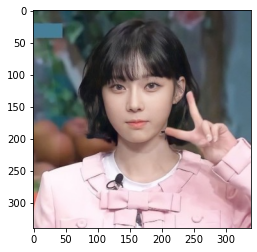

In [569]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 사진을 잘 불러왔으니 이제 얼굴인식을 해보자. dlib의 hog detector를 사용해볼것이다.

In [570]:
detector_hog = dlib.get_frontal_face_detector()

In [571]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(103, 92) (211, 199)]]


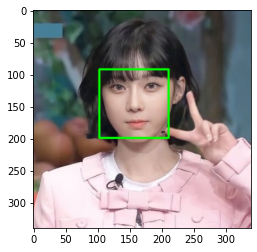

In [572]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 잘 인식 된것같다. 이제 이 초록색 네모박스를 이용해 랜드마크를 찍어보자.

### 랜드마크 모델을 가져오자.

In [573]:
landmark_predictor = dlib.shape_predictor('/Users/janghan-yeong/aiffel/camera/shape_predictor_68_face_landmarks (1).dat')

### 이제 이 랜드마크모델을 찍어보자.

In [574]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


### 총 68개의 점을 찍어었다.

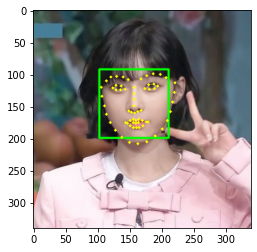

In [575]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 잘 찍힌것같다. 이제 고양이 수염스티커를 넣어주기위해 랜드마크의 좌표를 알아보자.

In [576]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0]
    y = landmark[33][1] + dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(158, 160)
(x,y) : (158,214)
(w,h) : (109,109)


### 이제 고양이 수염스티커사진을 가져온뒤 좌표를 얼굴사진에 맡게 좌표를찍어주자.

In [577]:
img_sticker = cv2.imread('/Users/janghan-yeong/aiffel/cat.png') # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(109, 109, 3)


In [578]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (104,105)


In [579]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (104,105)


In [580]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

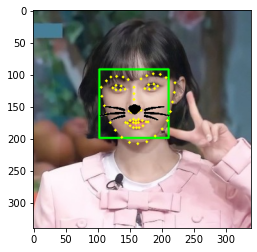

In [581]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

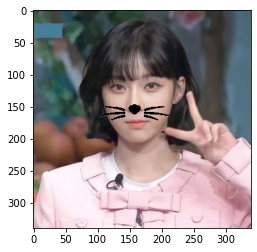

In [582]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 잘 붙혀진것같다. 하지만 문제가 몇가지 존재한다.
### 각도에따른문제, 사진의 거리의문제

### 각도에따른 문제와 거리의 문제를 해결해보자.

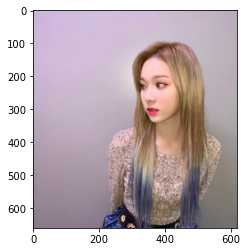

In [583]:
img_bgr = cv2.imread('/Users/janghan-yeong/Desktop/winter_left.jpeg')    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_rgb)
plt.show()

### 거리가 멀고 옆모습은 사진을 가져와보았다. 이 사진에 고양이 스티커를 붙혀보자.

In [584]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(287, 167) (442, 322)]]


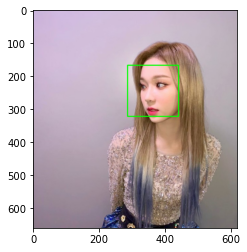

In [585]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [586]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


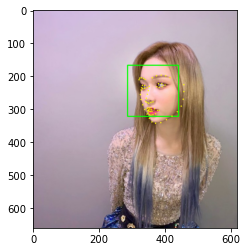

In [587]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 필자는 여기서 좌표값을 평상시보다 살짝 오른쪽으로 주어 문제를 해결하려고했다.

In [588]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[35]) # 코의 index는 30 입니다
    x = landmark[35][0]+8
    y = (landmark[35][1]  + dlib_rect.height()//2) +15
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(364, 278)
(x,y) : (372,371)
(w,h) : (156,156)


In [589]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (294,215)


In [590]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (294,215)


In [591]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

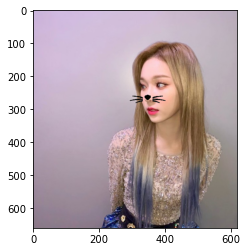

In [592]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 해결된듯 보인다. 
### 이것으로 사진어플 기능중 스티커를 붙히는 기능을 실제로 만들어보았다. 어렵지만 재밌는것같았다. 이것으로 Explolation08과제를 마친다.